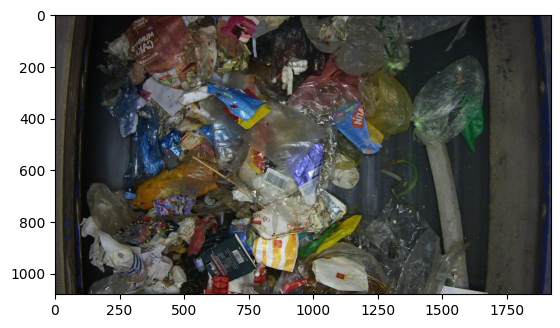

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = "Warp-D/train/images/Monitoring_photo1_04-Mar_03-09-16.jpg"

img =mpimg.imread(image)

plt.imshow(img)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [5]:
PATH = 'Warp-D/train/labels'
IMG_ROOT = 'Warp-D/train/images'

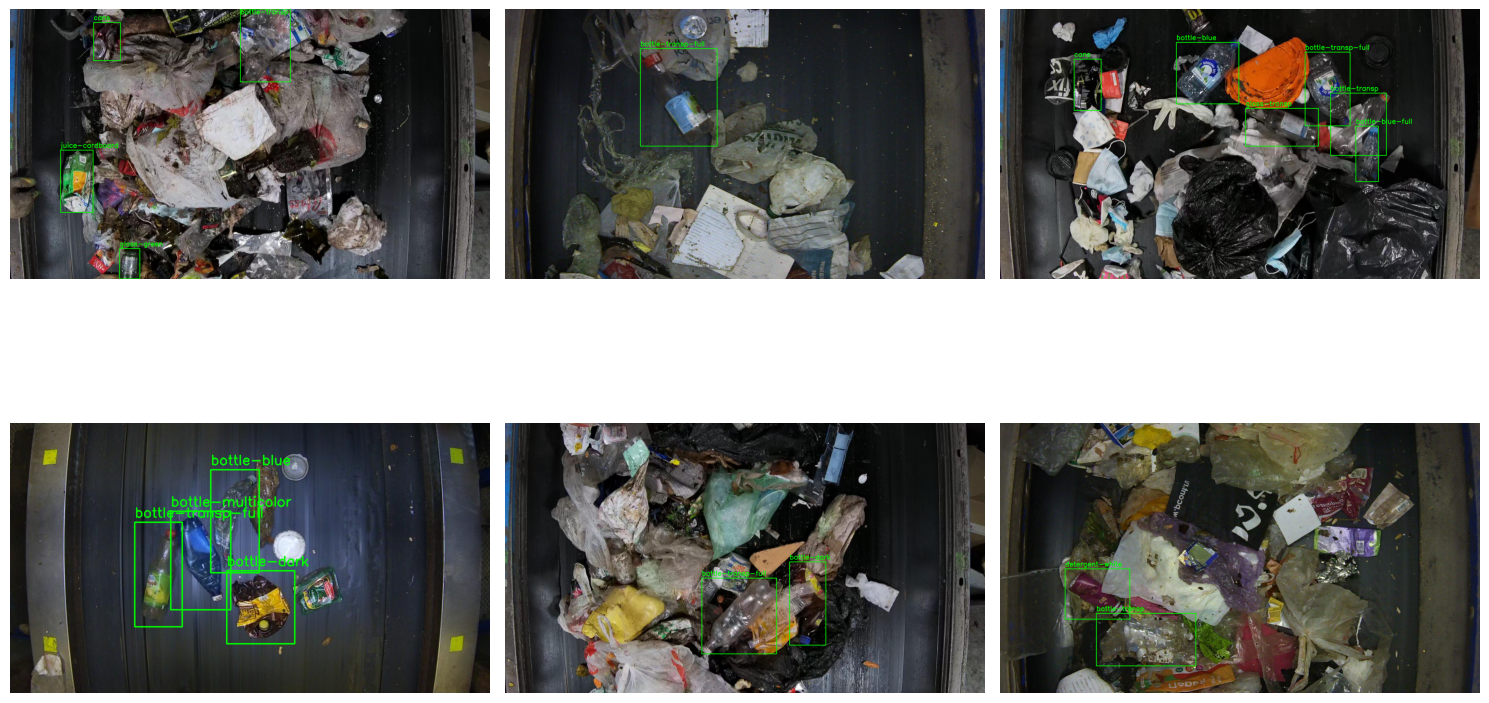

In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def plot_image_with_bbox(image_path, label_path, classes, ax):
    """Plots an image with bounding boxes and class names from a YOLO formatted label file on a given axes."""
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            line = line.strip()  # Remove leading/trailing whitespace
            if not line:  # Skip empty lines
                continue
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())

            # Convert normalized coordinates to pixel coordinates
            x1 = int((x_center - bbox_width/2) * width)
            y1 = int((y_center - bbox_height/2) * height)
            x2 = int((x_center + bbox_width/2) * width)
            y2 = int((y_center + bbox_height/2) * height)

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Get class name
            class_name = classes[int(class_id)]

            # Determine text position
            text_x = x1
            text_y = y1 - 10  # Default position above the bounding box

            # Adjust text position if it's too close to the top edge
            if text_y < 0:
                text_y = y1 + 20 # Place text inside the bounding box, below the top edge


            # Draw class name on the image
            cv2.putText(img, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')


# Define the path to the classes.txt file
CLASSES_FILE = 'Warp-D/classes.txt'

# Read the class names from the classes.txt file
with open(CLASSES_FILE, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# Get list of image files
image_files = [f for f in os.listdir(IMG_ROOT) if f.endswith('.jpg')]

# Select 6 random image files
random_images = random.sample(image_files, 6)

# Create a grid for plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot images with bounding boxes in the grid
for i, img_file in enumerate(random_images):
    img_path = os.path.join(IMG_ROOT, img_file)
    label_file = img_file.replace('.jpg', '.txt')
    label_path = os.path.join(PATH, label_file)

    if os.path.exists(label_path):
        plot_image_with_bbox(img_path, label_path, classes, axes[i])
    else:
        print(f"Label file not found for {img_file}")
        axes[i].axis('off') # Turn off axis for empty subplot

plt.tight_layout()
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/m-kichik/warp-d_cfg/refs/heads/master/warp-d_config.yaml

--2025-09-09 08:52:39--  https://raw.githubusercontent.com/m-kichik/warp-d_cfg/refs/heads/master/warp-d_config.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 933 [text/plain]
Saving to: ‘warp-d_config.yaml’

warp-d_config.yaml  100%[===================>]     933  --.-KB/s    in 0s      

2025-09-09 08:52:39 (56.3 MB/s) - ‘warp-d_config.yaml’ saved [933/933]



In [1]:
import torch
print(torch.cuda.is_available())

True


In [21]:
from ultralytics import YOLO

# Create a new YOLO model from scratch
model = YOLO("yolo11n.yaml")

# # Load a pretrained YOLO model (recommended for training)
# model = YOLO("yolo11n.pt")

# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="./warp-d_config.yaml", epochs=3,device=0)

Ultralytics 8.3.197  Python-3.12.4 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./warp-d_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [24]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [22]:
from ultralytics import YOLO
model = YOLO('./yolo11n.pt') # Replace 'yolov8n.pt' with your desired model file

In [23]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [36]:
from ultralytics import YOLO

# Load a model
model = YOLO("./runs/detect/train7/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val(data="./warp-d_config.yaml")  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.197  Python-3.12.4 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,587,612 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 481.2203.1 MB/s, size: 249.9 KB)
val: Scanning C:\Users\udayt\OneDrive\Desktop\ABC\Warp-D\test\labels.cache... 522 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 522/522  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 6.3it/s 5.3s<0.1s
                   all        522       1551      0.504    0.00832    0.00228   0.000628
           bottle-blue         87        104          0          0    0.00134   0.000277
          bottle-green         65         74     0.0241     0.0405    0.00776    0.00148
           bottle-dark         80         95          0          0   0.000368   0.000151
           bottle-milk         54         57     0.0318     0.0526     0.0116    0.00415
     

array([ 0.00027745,   0.0014802,  0.00015095,   0.0041536,  0.00047584,           0,  6.2332e-05,  0.00027866,  0.00047823,  0.00035281,  0.00066447,  0.00073059,  0.00018949,           0,           0,           0,   3.278e-05,           0,   0.0015268,           0,           0,           0,  0.00066266,   0.0060796,
                 0,           0,           0,           0])

In [35]:
from ultralytics import YOLO

# Load a model
model = YOLO("./runs/detect/train7/weights/best.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["image1.jpg", "image2.jpg"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


0: 384x640 1 bottle-transp, 29.5ms
1: 384x640 (no detections), 29.5ms
Speed: 3.7ms preprocess, 29.5ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)


In [25]:
model = YOLO("yolo11n.pt")

In [29]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [34]:
model1 = YOLO("./runs/detect/train7/weights/best.pt")

results = model.train(data="./warp-d_config.yaml", epochs=100,device=0)

Ultralytics 8.3.197  Python-3.12.4 torch-2.8.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./warp-d_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=./runs/detect/train7/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=